PS: this should be used for low number of objects, from large numbers, use the download data service: [https://fink-portal.org/download](https://fink-portal.org/download)

Documentation for this is [here](https://fink-portal.org/api)


In [9]:
import requests
import pandas as pd
import io
import numpy as np
import matplotlib.pylab as plt

In [3]:
name = 'ZTF17aaarlat'

# get data for ZTF19acnjwgm
r = requests.post(
    'https://fink-portal.org/api/v1/objects',
    json={
        'objectId': name,
        'output-format': 'json',
        'withcutouts': 'True'
    }
)

# Format output in a DataFrame
pdf = pd.read_json(io.BytesIO(r.content))

pdf.to_parquet('/media3/CRP7/hosts/data/GALACTIC/' + name + '.parquet' )

In [4]:
obj = pd.read_parquet('/media3/CRP7/hosts/data/GALACTIC/' + name + '.parquet')

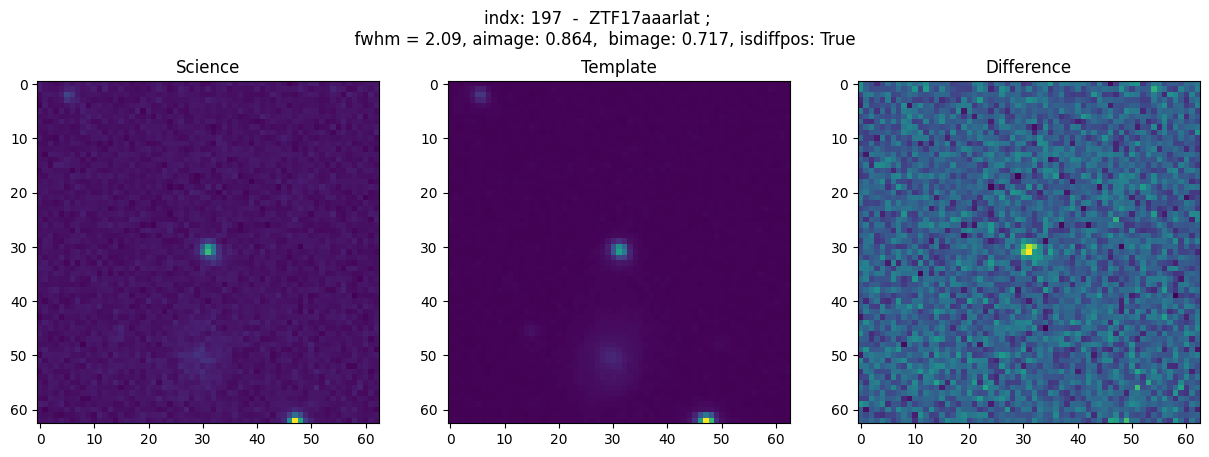

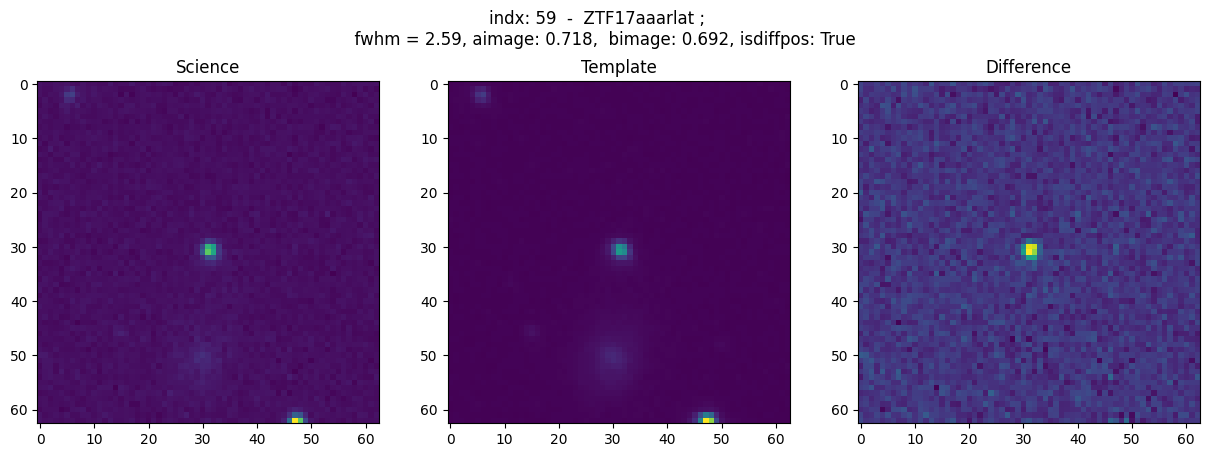

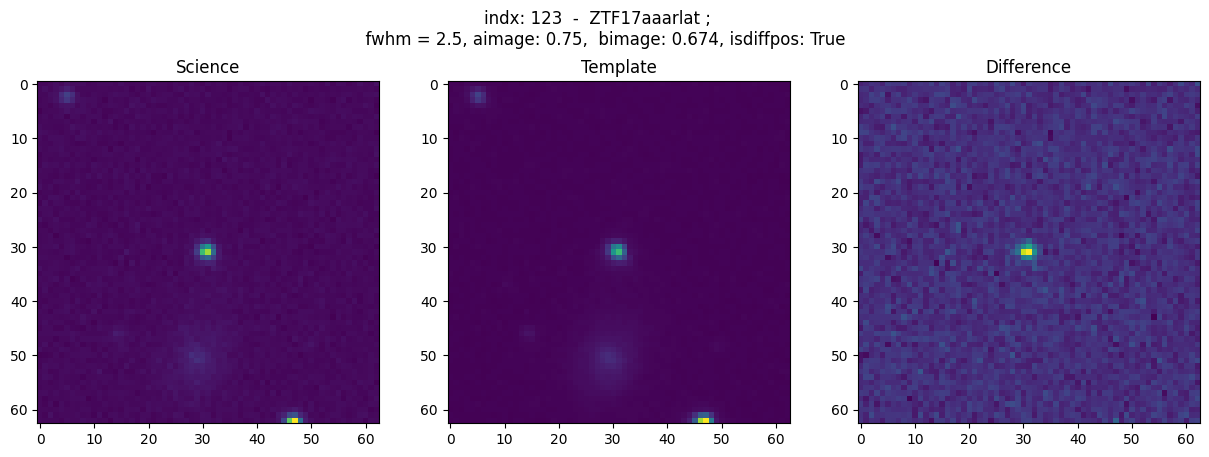

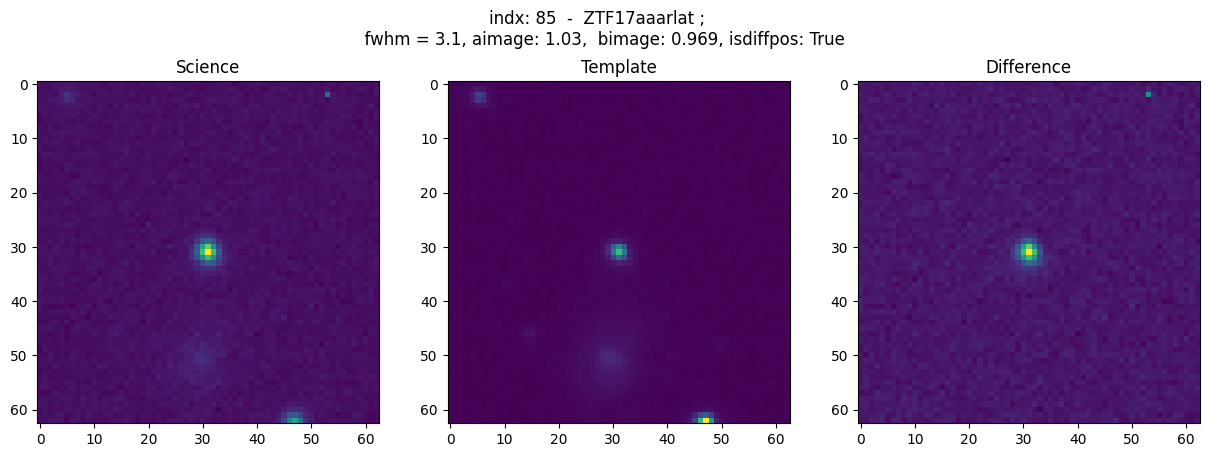

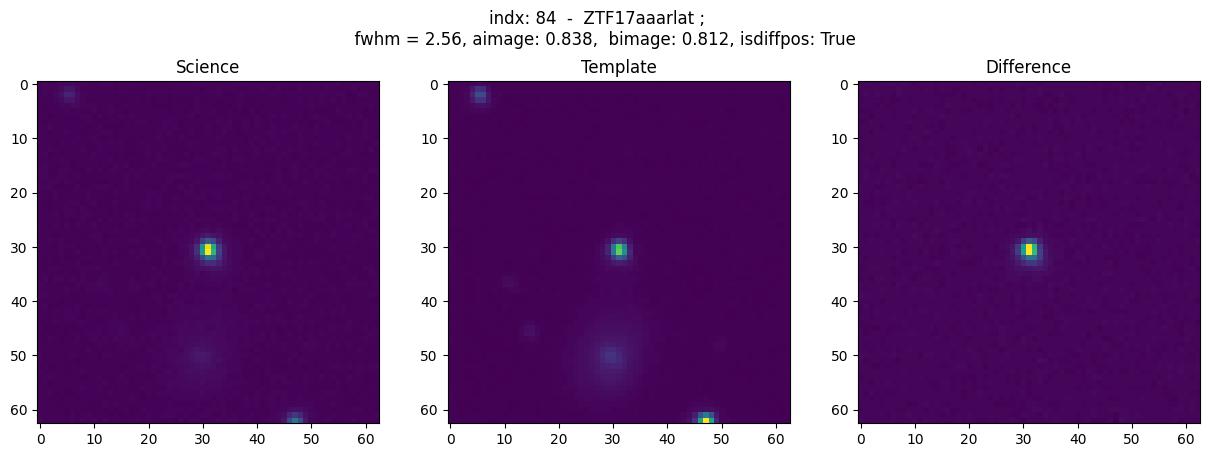

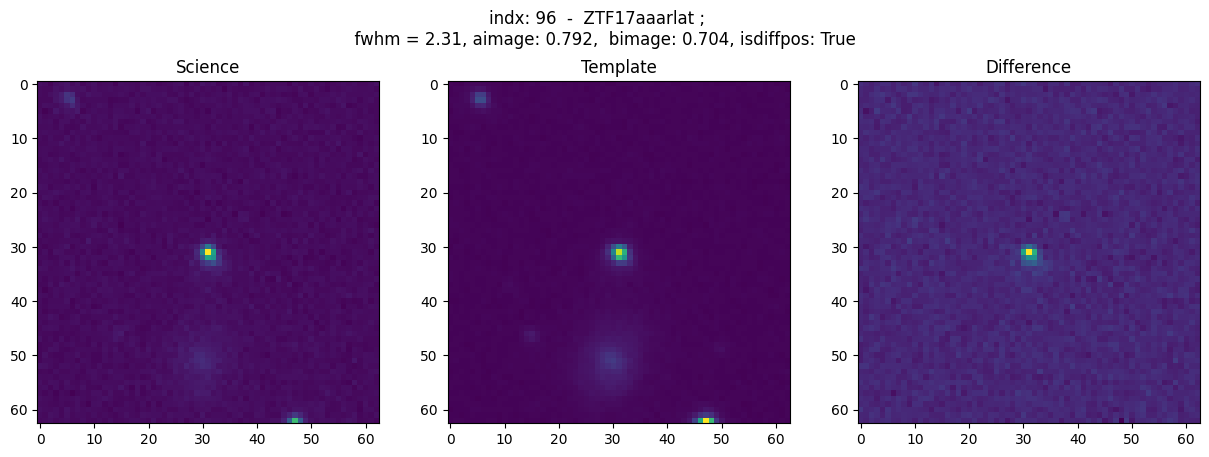

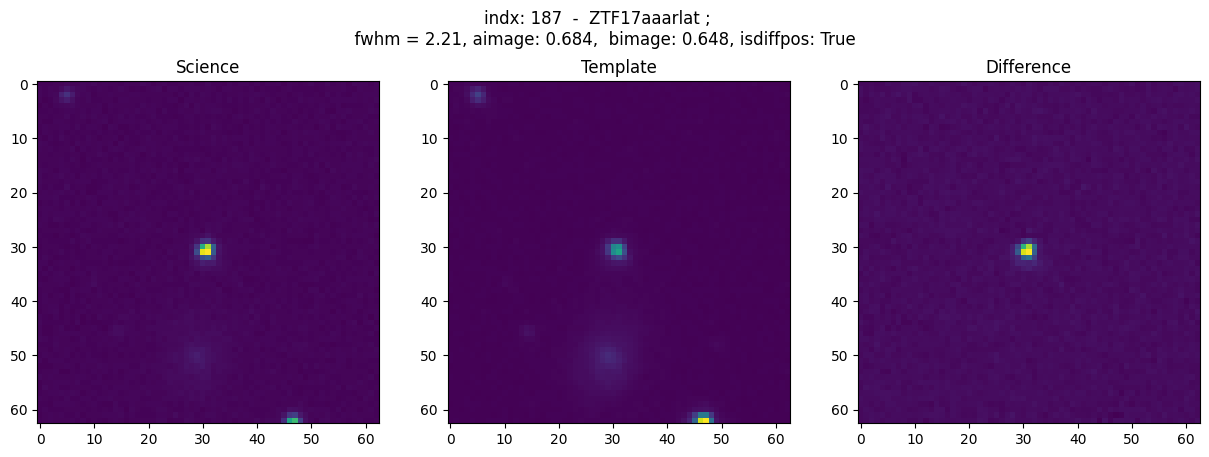

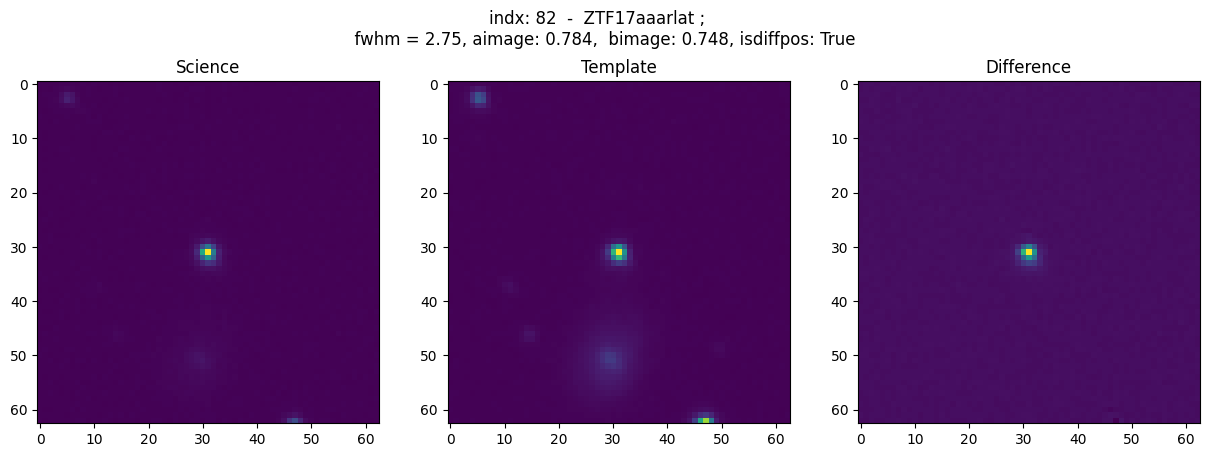

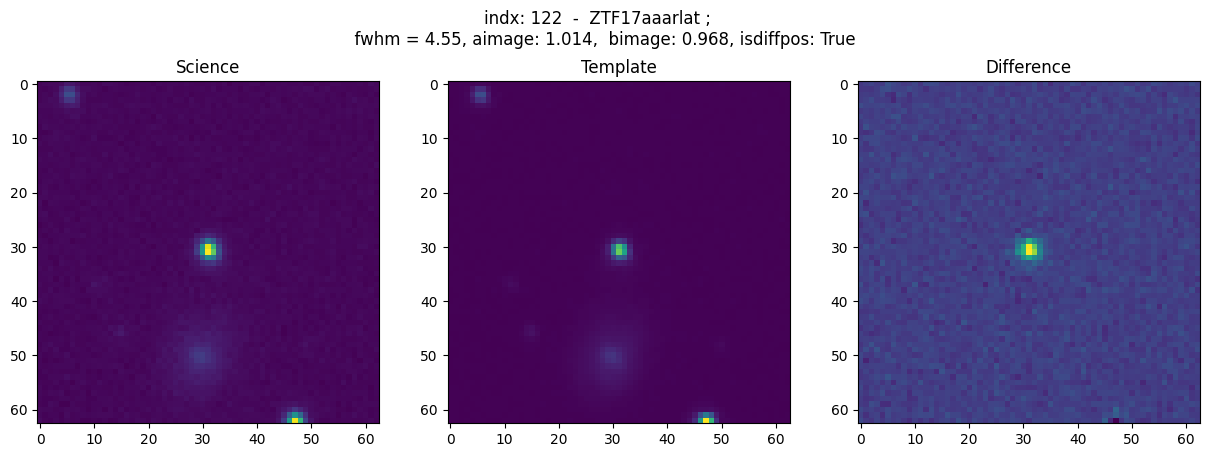

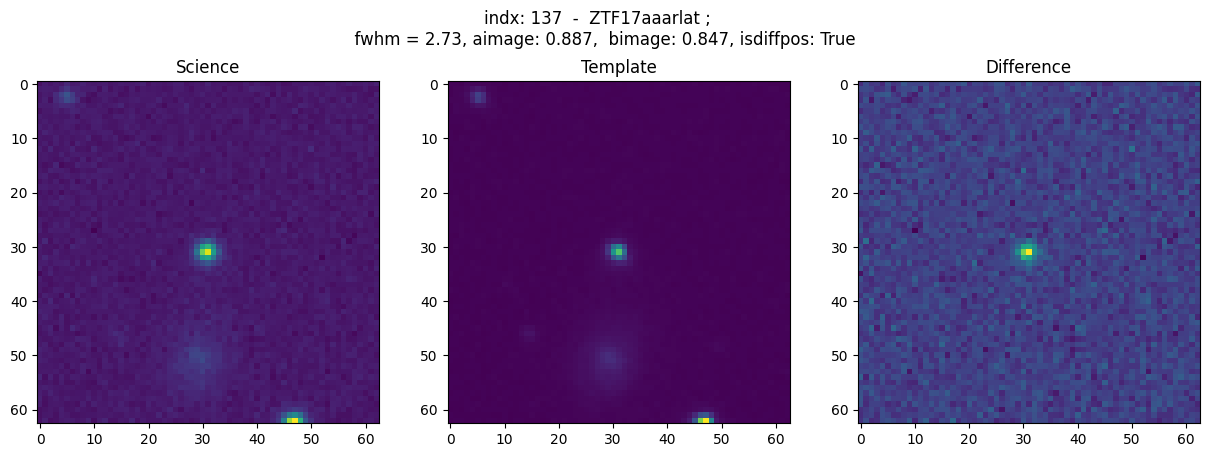

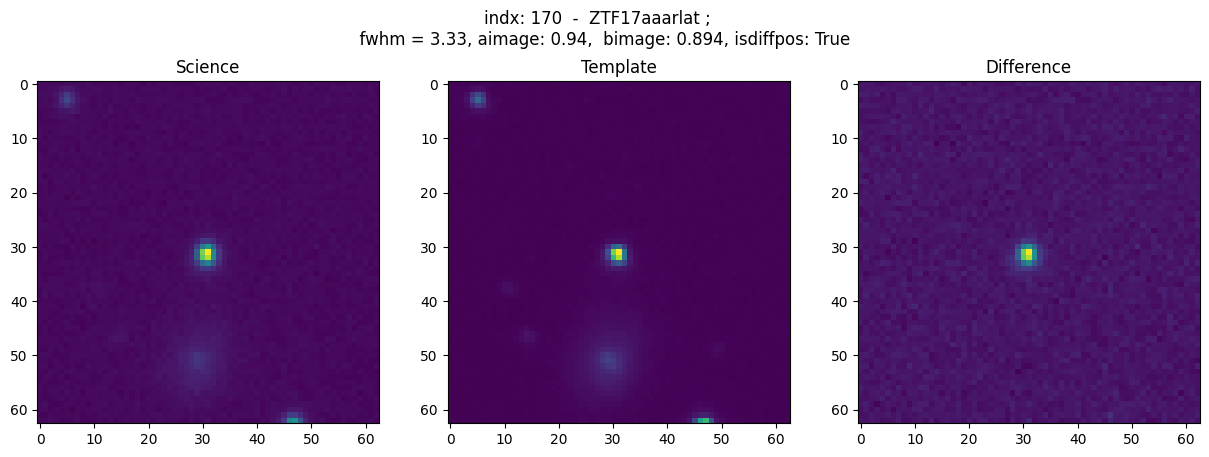

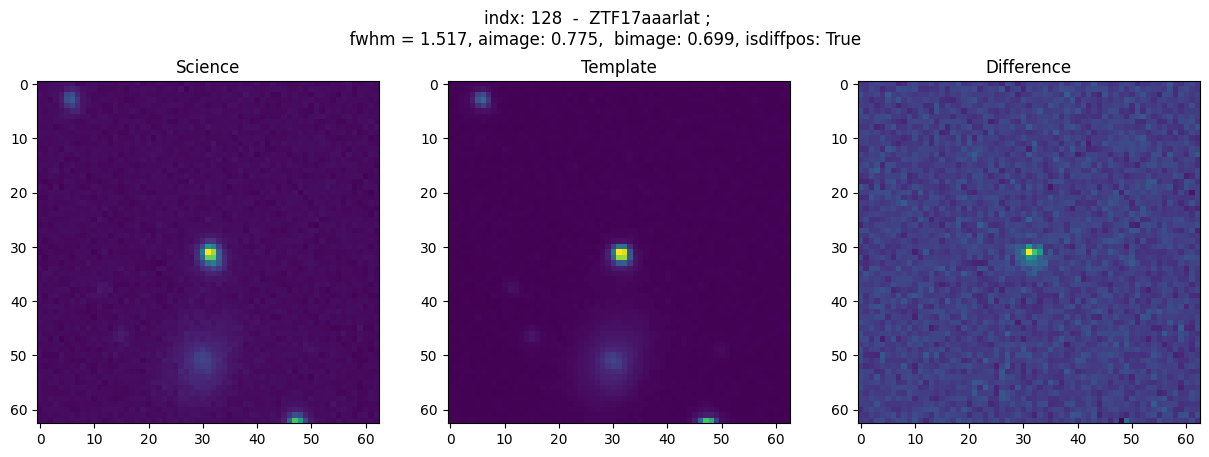

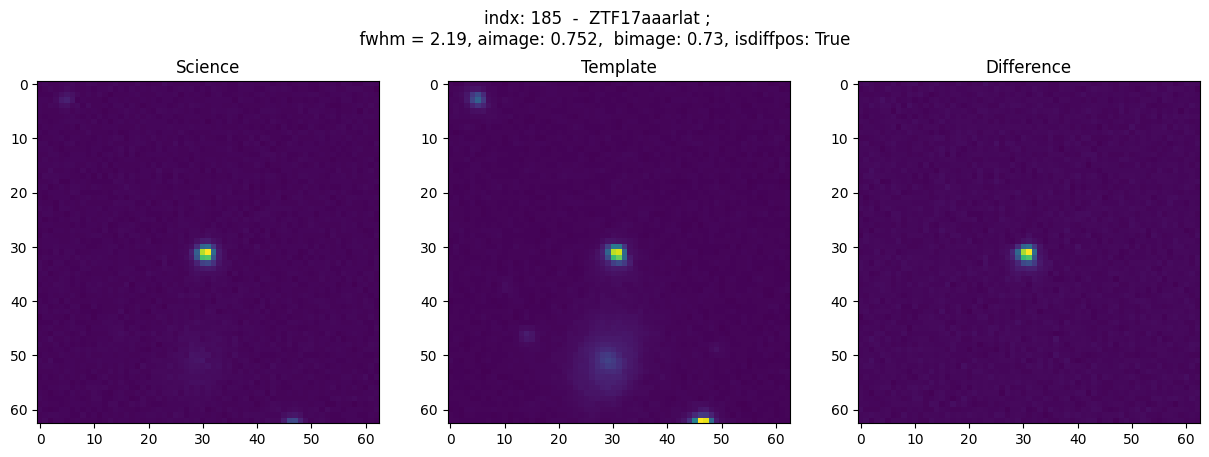

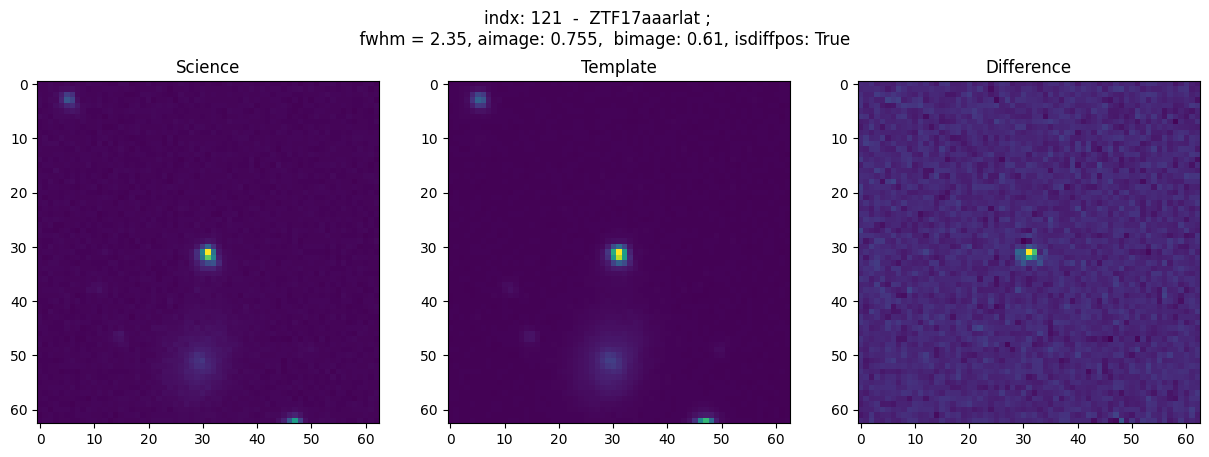

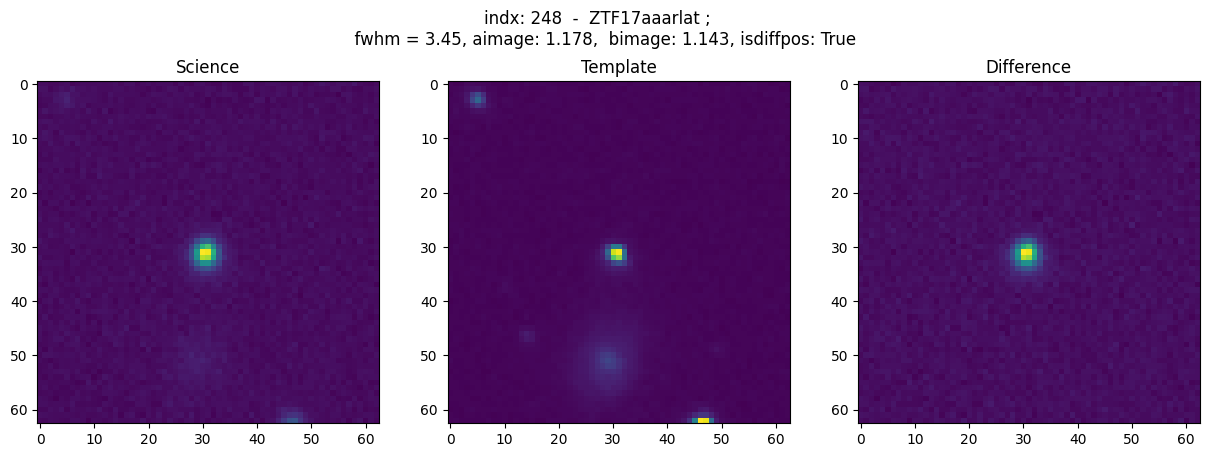

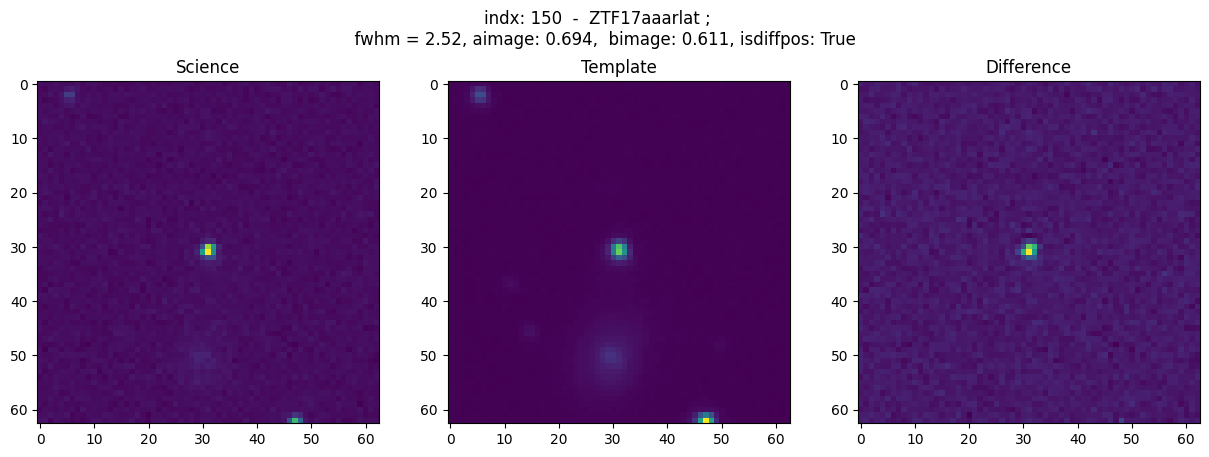

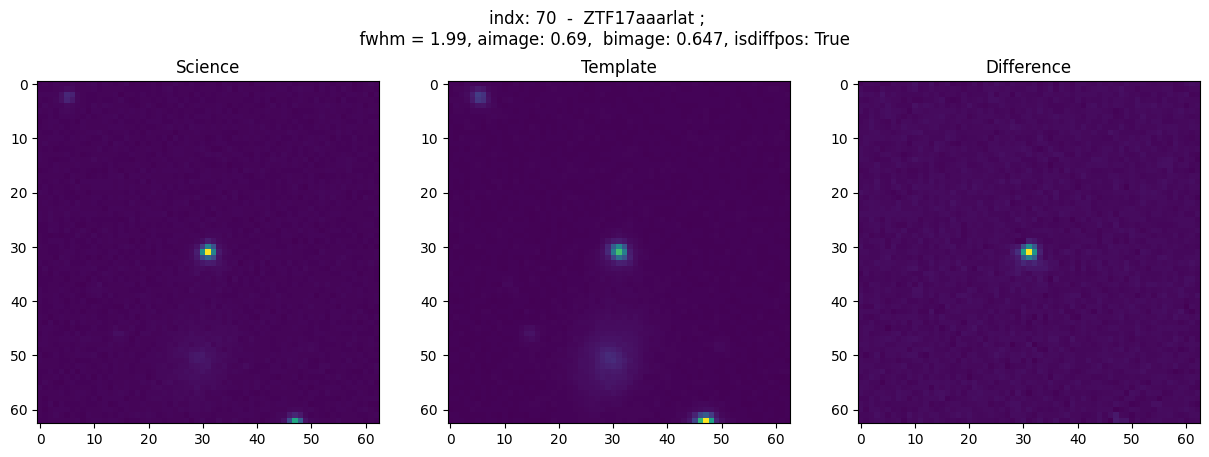

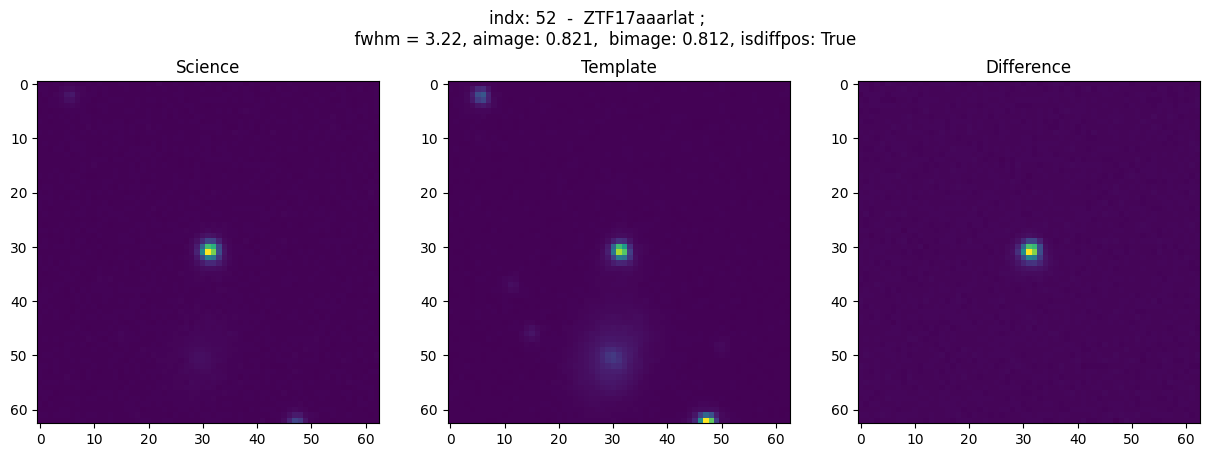

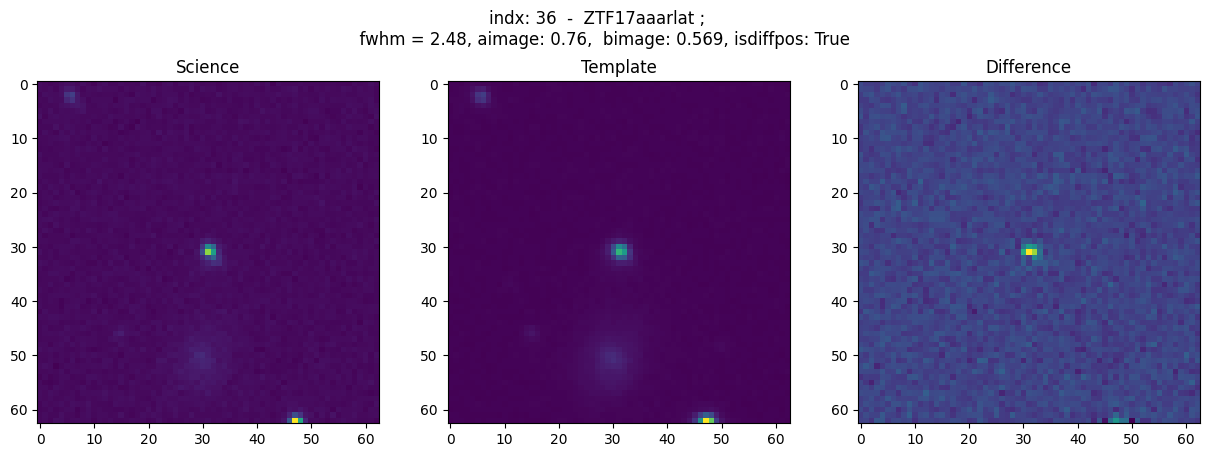

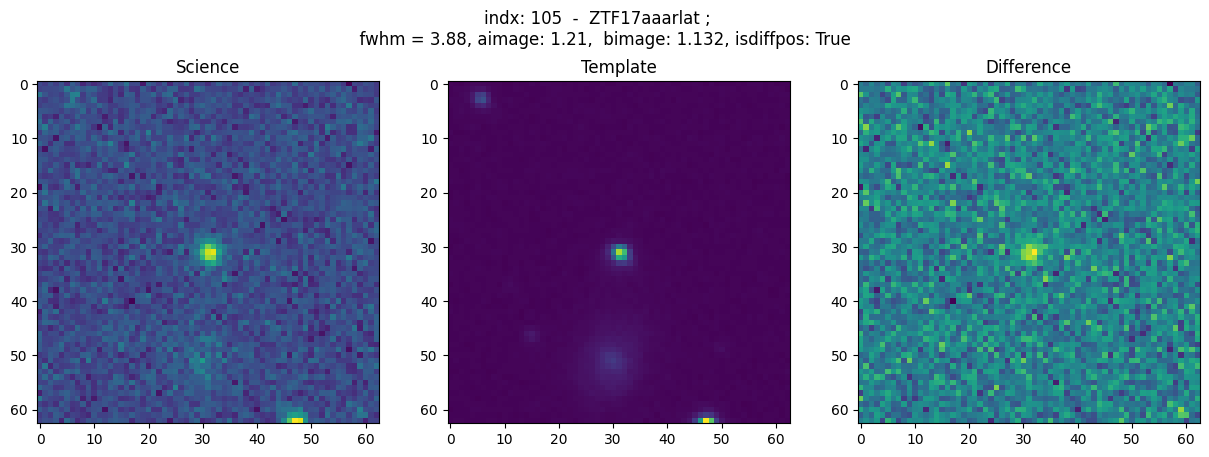

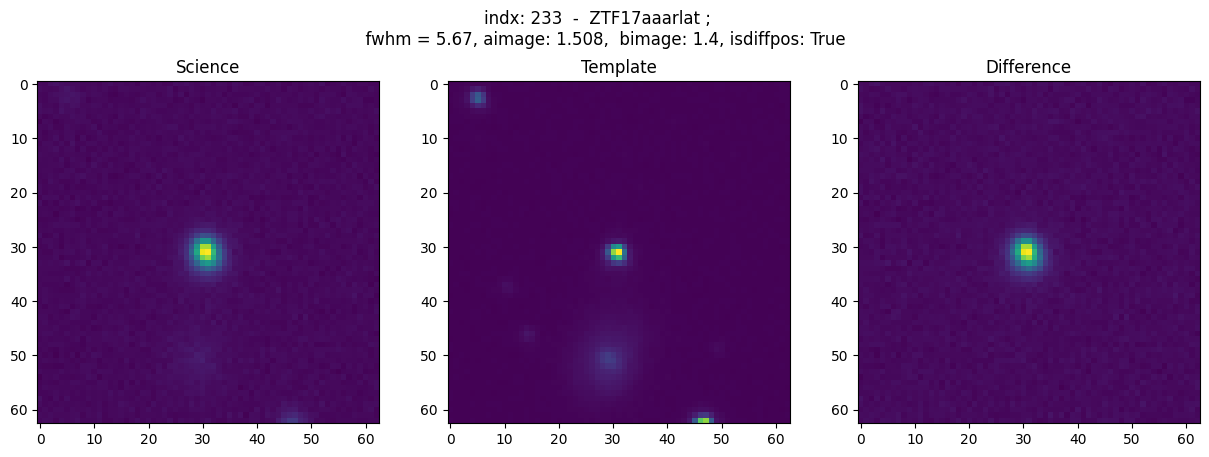

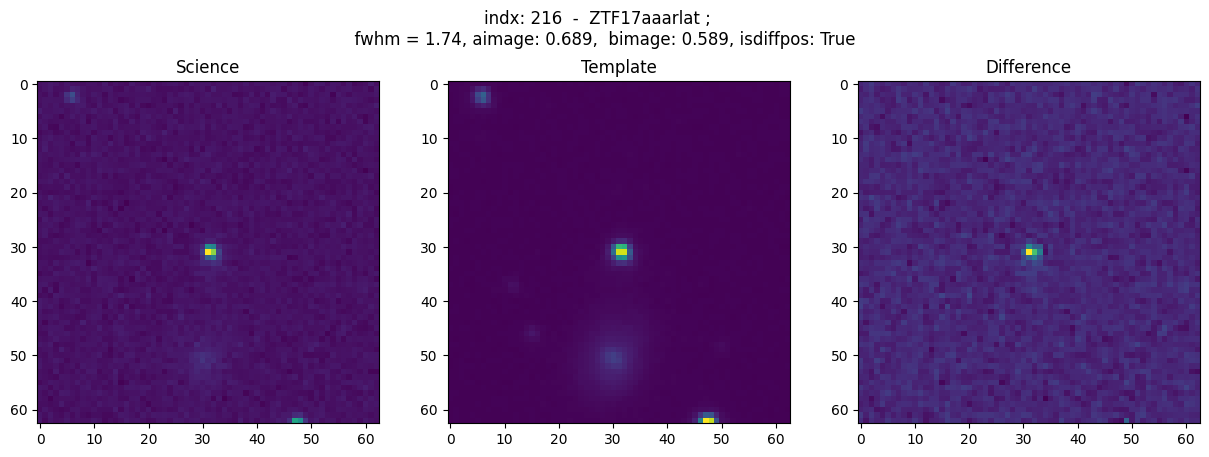

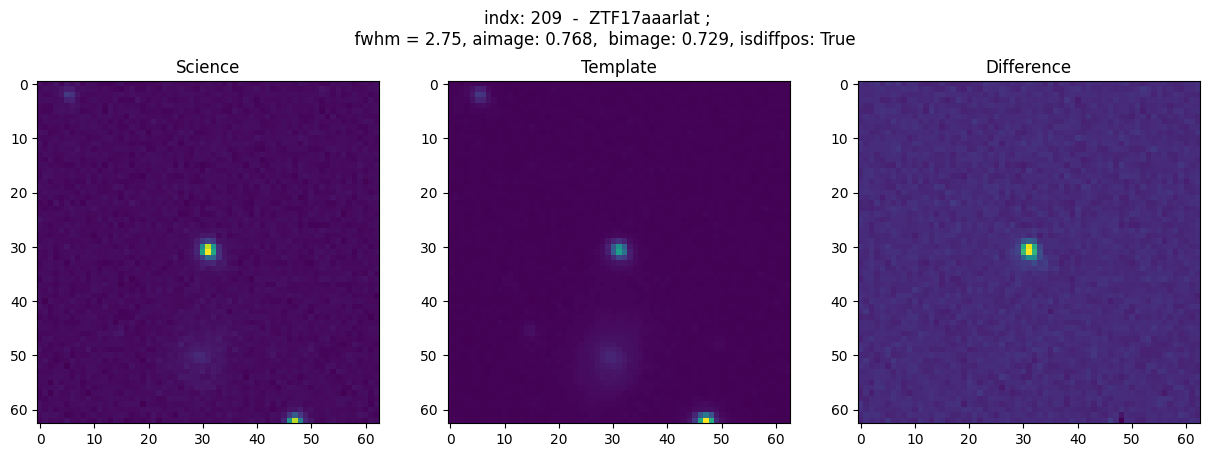

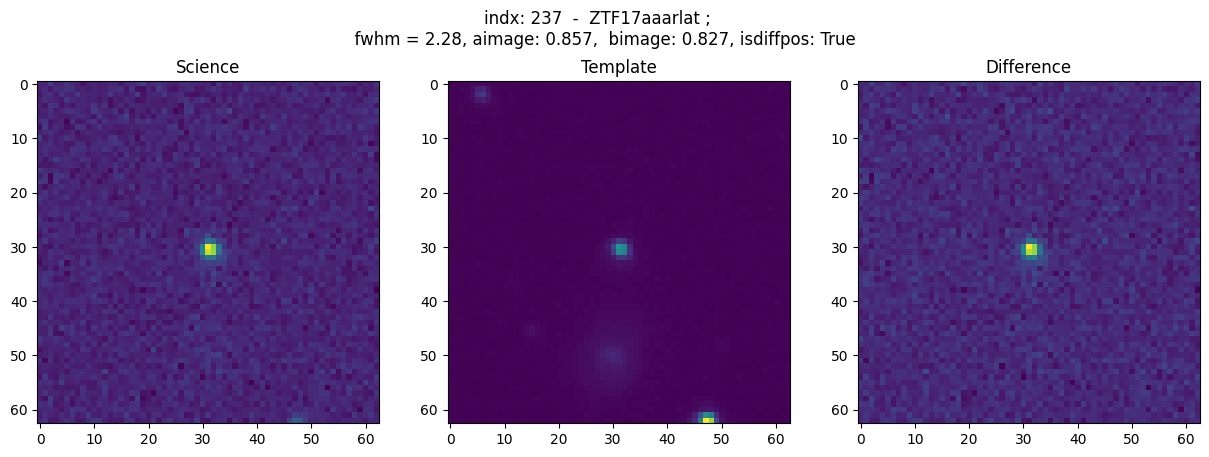

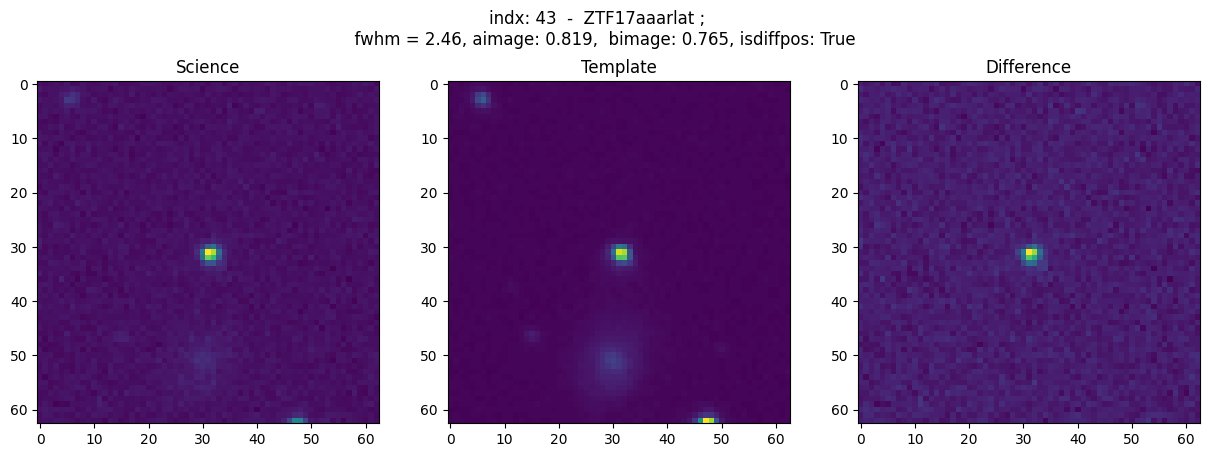

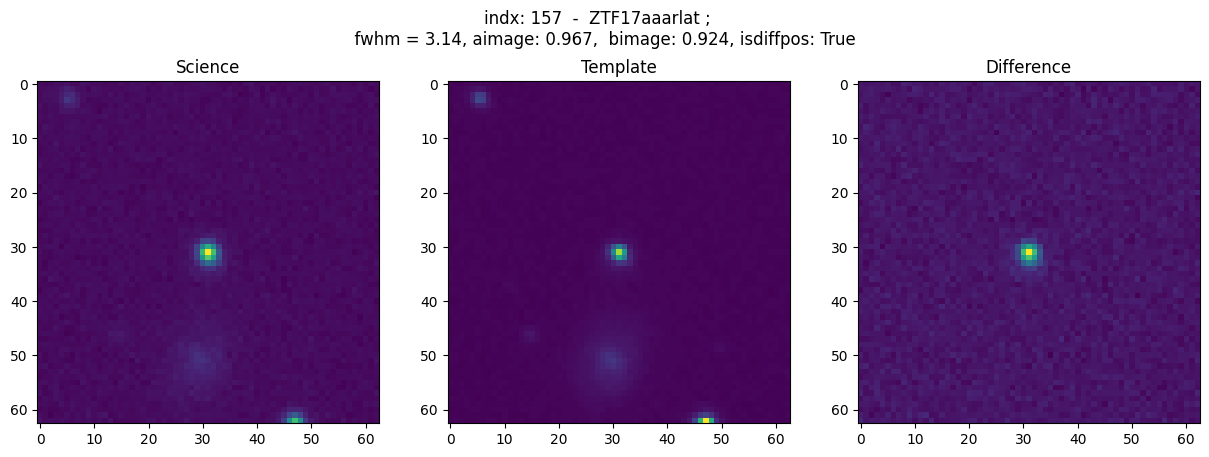

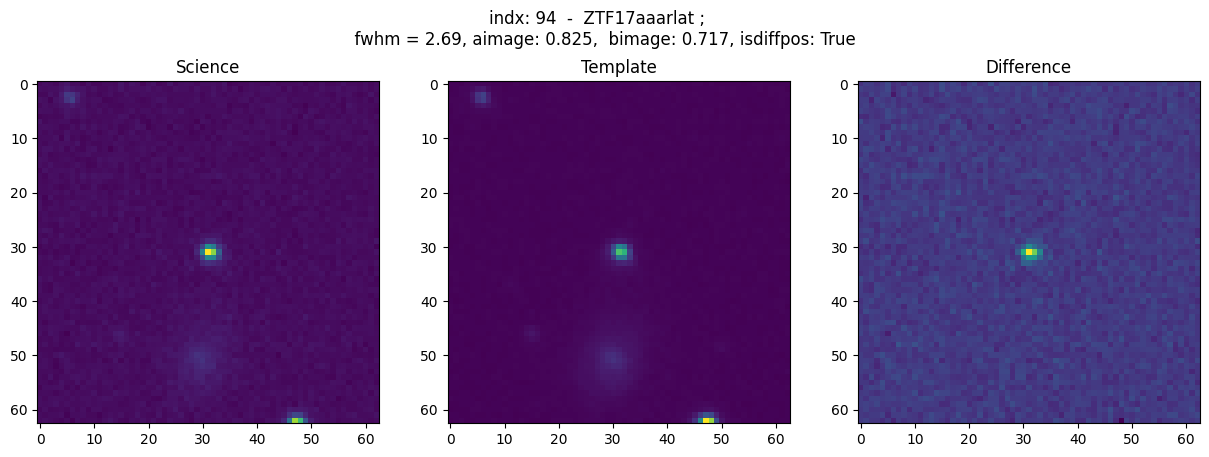

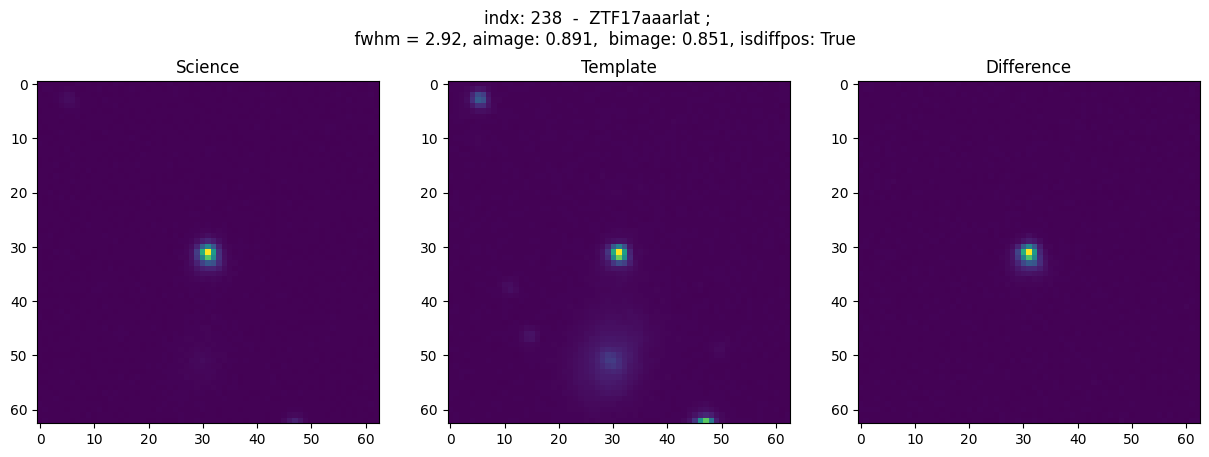

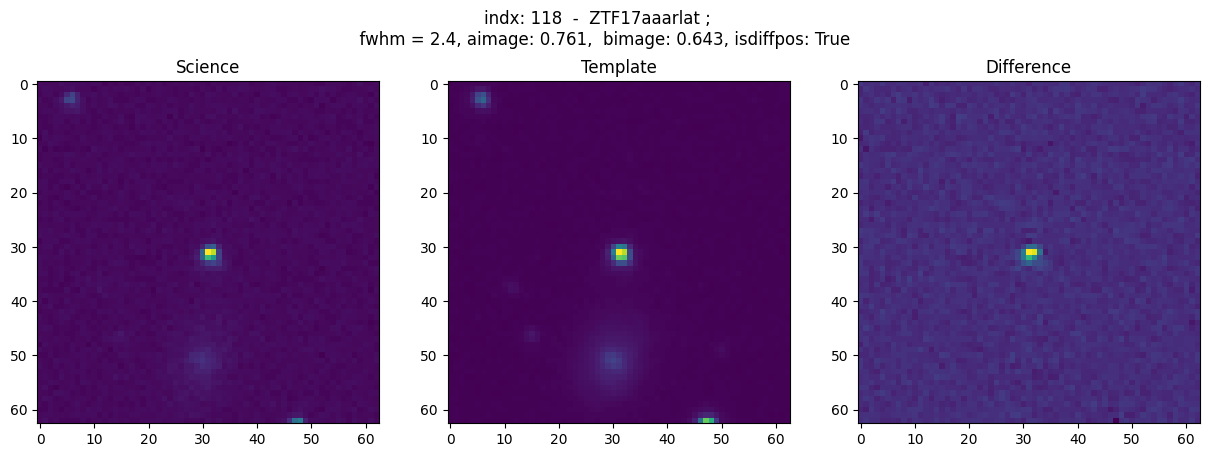

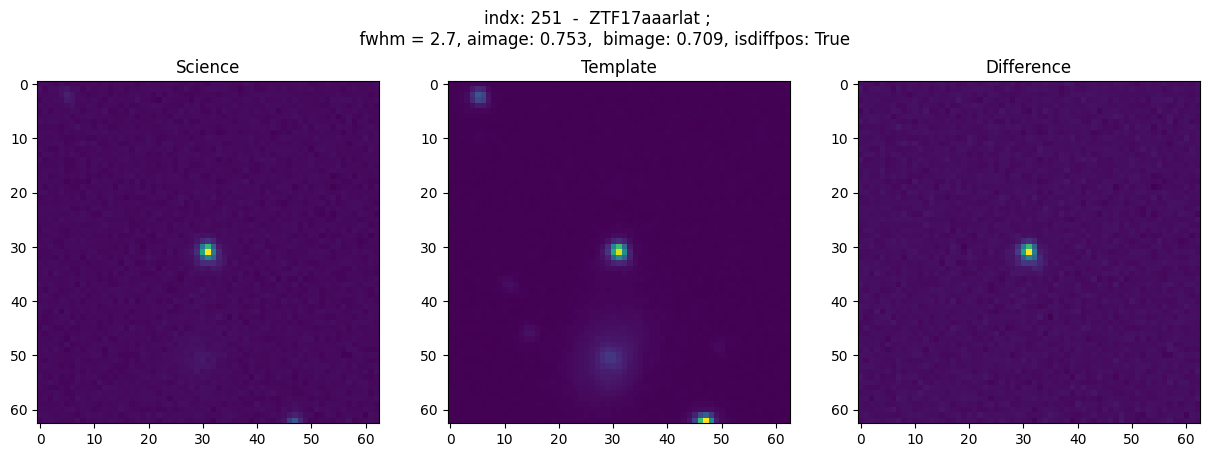

In [11]:
# plot
columns = [
    'b:cutoutScience_stampData',
    'b:cutoutTemplate_stampData',
    'b:cutoutDifference_stampData'
]

title = ['Science', 'Template', 'Difference']

# number of stamps set to plot
n_to_plot = 30

# select a random alert
for indx in np.random.choice(np.arange(pdf.shape[0]), size=n_to_plot, replace=False):
    
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    objid = pdf.iloc[indx]['i:objectId']
    fwhm = str(round(pdf.iloc[indx]['i:fwhm'], 3))
    aimage = str(round(pdf.iloc[indx]['i:aimage'], 3))
    bimage = str(round(pdf.iloc[indx]['i:bimage'], 3))
    isdiffpos = str(bool(pdf.iloc[indx]['i:isdiffpos']))
    
    fig.suptitle('indx: ' + str(indx) + '  -  ' + objid + ' ; ' + '\n  fwhm = ' + fwhm + ', ' + \
                'aimage: ' + aimage + ',  bimage: ' + bimage + ', isdiffpos: ' + isdiffpos)

    for i,ax in enumerate(axes.flat):
        ax.set_title(title[i])
        data = np.array(pdf[columns[i]].values[indx])

        ax.imshow(data.astype(float))

    plt.show()